In [1]:
import pandas as pd 
import numpy as np 
import json 

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
import datetime as dt 

import plotly.express as px
import plotly.graph_objects as go 
import plotly.io as pio

import warnings 
warnings.filterwarnings('ignore')

import requests
import glob
import xlrd

## Reading Files

In [2]:
df1=pd.read_csv(r"D:\Data Science\Project6\Resale Flat Prices (Based on Approval Date) 1990 - 1999.csv")
df2=pd.read_csv(r"D:\Data Science\Project6\Resale Flat Prices (Based on Registration Date) From Jan 2015 - Dec 2016.csv")  
df3=pd.read_csv(r"D:\Data Science\Project6\Resale Flat Prices (Based on Registration Date) From Mar 2012 - Dec 2014.csv")
df4=pd.read_csv(r"D:\Data Science\Project6\Resale Flat Prices (Based on Approval Date) 2000 - Feb 2012.csv") 
df5=pd.read_csv( r"D:\Data Science\Project6\Resale flat prices (based on registration date) from Jan 2017 onwards.csv")

df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
935046,2024-09,YISHUN,5 ROOM,432C,YISHUN AVE 1,01 TO 03,112.0,Improved,2015,610000.0,90 years 02 months
935047,2024-09,YISHUN,5 ROOM,317A,YISHUN AVE 9,07 TO 09,112.0,Improved,2015,730000.0,90 years 02 months
935048,2024-09,YISHUN,5 ROOM,305,YISHUN CTRL,10 TO 12,122.0,Improved,1988,660000.0,62 years 07 months
935049,2024-09,YISHUN,5 ROOM,149,YISHUN ST 11,07 TO 09,121.0,Improved,1985,630000.0,59 years 07 months


In [3]:
df.shape

(935051, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935051 entries, 0 to 935050
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                935051 non-null  object 
 1   town                 935051 non-null  object 
 2   flat_type            935051 non-null  object 
 3   block                935051 non-null  object 
 4   street_name          935051 non-null  object 
 5   storey_range         935051 non-null  object 
 6   floor_area_sqm       935051 non-null  float64
 7   flat_model           935051 non-null  object 
 8   lease_commence_date  935051 non-null  int64  
 9   resale_price         935051 non-null  float64
 10  remaining_lease      226001 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.5+ MB


In [5]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,935051.0,95.687921,25.812647,28.0,73.0,93.0,113.0,366.7
lease_commence_date,935051.0,1988.359049,10.746633,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,935051.0,323268.615403,172793.600675,5000.0,195000.0,300000.0,420000.0,1588000.0


In [7]:
df['resale_price'].value_counts()

resale_price
300000.00    6938
350000.00    6883
280000.00    6556
320000.00    6543
380000.00    6341
             ... 
326600.00       1
321000.88       1
253280.00       1
249588.00       1
458988.00       1
Name: count, Length: 9638, dtype: int64

## Data Cleaning

In [8]:
df.nunique()

month                   417
town                     27
flat_type                 8
block                  2713
street_name             586
storey_range             25
floor_area_sqm          213
flat_model               34
lease_commence_date      55
resale_price           9638
remaining_lease         728
dtype: int64

In [9]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [10]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row,str):
        if 'years' in row:
            parts=row.split()
            years=float(parts[0])
            months=float(parts[2]) if len(parts) > 2 else 0
            return years + months/ 12
        
    return row

In [11]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [12]:
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
935046,2024-09,YISHUN,5 ROOM,432C,YISHUN AVE 1,01 TO 03,112.0,Improved,2015,610000.0,90.166667
935047,2024-09,YISHUN,5 ROOM,317A,YISHUN AVE 9,07 TO 09,112.0,Improved,2015,730000.0,90.166667
935048,2024-09,YISHUN,5 ROOM,305,YISHUN CTRL,10 TO 12,122.0,Improved,1988,660000.0,62.583333
935049,2024-09,YISHUN,5 ROOM,149,YISHUN ST 11,07 TO 09,121.0,Improved,1985,630000.0,59.583333
935050,2024-09,YISHUN,EXECUTIVE,824,YISHUN ST 81,01 TO 03,146.0,Maisonette,1987,893888.0,62.250000


In [13]:
df['remaining_lease'].value_counts()

remaining_lease
68.000000    711673
95.000000      2421
67.000000      2221
69.000000      1915
71.000000      1776
              ...  
97.250000         1
97.583333         1
97.750000         1
97.083333         1
41.416667         1
Name: count, Length: 675, dtype: int64

In [14]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

## DataType Conversion

In [15]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
dtype: object

In [16]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.000000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.000000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,68.000000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,68.000000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,68.000000
...,...,...,...,...,...,...,...,...,...,...,...
935046,2024-09,YISHUN,5 ROOM,432C,YISHUN AVE 1,01 TO 03,112.0,Improved,2015,610000.0,90.166667
935047,2024-09,YISHUN,5 ROOM,317A,YISHUN AVE 9,07 TO 09,112.0,Improved,2015,730000.0,90.166667
935048,2024-09,YISHUN,5 ROOM,305,YISHUN CTRL,10 TO 12,122.0,Improved,1988,660000.0,62.583333
935049,2024-09,YISHUN,5 ROOM,149,YISHUN ST 11,07 TO 09,121.0,Improved,1985,630000.0,59.583333


In [17]:
df[['resale_year','resale_month']]=df['month'].str.split('-',expand=True)

#drop the resale month column 
df.drop('month',axis=1,inplace=True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [18]:
df[['storey_lower_bound','storey_upper_bound']]=df['storey_range'].str.split("TO",expand=True)

df['storey_lower_bound']=pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound']=pd.to_numeric(df['storey_upper_bound'])
df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
935049,YISHUN,5 ROOM,149,YISHUN ST 11,07 TO 09,121.0,Improved,1985,630000.0,59.583333,2024,09,7,9
935050,YISHUN,EXECUTIVE,824,YISHUN ST 81,01 TO 03,146.0,Maisonette,1987,893888.0,62.250000,2024,09,1,3


In [19]:
df.drop('storey_range',axis=1,inplace=True)

In [20]:

#CONVERTING

df["block"]=pd.to_numeric(df['block'],errors='coerce')
df["resale_year"]=pd.to_numeric(df['resale_year'],errors='coerce')
df["resale_month"]=pd.to_numeric(df['resale_month'],errors='coerce')
df["block"]=df["block"].fillna(df['block'].mode()[0])

In [21]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [22]:
df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
resale_year              int64
resale_month             int64
storey_lower_bound       int64
storey_upper_bound       int64
dtype: object

## Text Errors

In [23]:
object_data_cols=[var for var in df.columns if df[var].dtype=='object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [24]:
df['town'].value_counts()

town
TAMPINES           80521
YISHUN             70588
JURONG WEST        67207
BEDOK              67043
WOODLANDS          66088
ANG MO KIO         52397
HOUGANG            51163
BUKIT BATOK        44927
CHOA CHU KANG      38695
BUKIT MERAH        34656
PASIR RIS          33408
SENGKANG           33101
TOA PAYOH          31782
QUEENSTOWN         28976
GEYLANG            28383
CLEMENTI           28209
BUKIT PANJANG      27926
KALLANG/WHAMPOA    27478
JURONG EAST        24948
SERANGOON          22956
BISHAN             21383
PUNGGOL            21240
SEMBAWANG          14096
MARINE PARADE       8078
CENTRAL AREA        7201
BUKIT TIMAH         2537
LIM CHU KANG          64
Name: count, dtype: int64

In [25]:
df['flat_type'].value_counts()

flat_type
4 ROOM              355770
3 ROOM              297885
5 ROOM              197289
EXECUTIVE            70183
2 ROOM               12074
1 ROOM                1306
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [26]:
#Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid dublicte
df['flat_type'].value_counts()

flat_type
4 ROOM              355770
3 ROOM              297885
5 ROOM              197289
EXECUTIVE            70183
2 ROOM               12074
1 ROOM                1306
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [27]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17696
BEDOK RESERVOIR RD    14806
ANG MO KIO AVE 10     13880
ANG MO KIO AVE 3      12215
HOUGANG AVE 8          9410
                      ...  
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
SENGKANG WEST RD          1
BIDADARI PK DR            1
Name: count, Length: 586, dtype: int64

In [28]:
df['flat_model'].value_counts()

flat_model
Model A                   197860
Improved                  170096
New Generation            110999
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          47628
Simplified                 34585
Apartment                  25847
Standard                   25352
SIMPLIFIED                 23258
Maisonette                 17648
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10233
APARTMENT                   9901
DBSS                        3386
Adjoined flat               1264
Model A-Maisonette          1107
MODEL A-MAISONETTE           982
Terrace                      449
Type S1                      445
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      220
2-room                       146
Premium Apartment Loft       114
Premium Maisonette            86
Improved-Maisonette           84

In [29]:
df['flat_model']=df['flat_model'].replace({'MODEL A':'model A','NEW GENERATION':'New Generation',
                                           'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                           'MULTI GENERATION':'Multi Generation','2-ROOM':'2-room',
                                           'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                           'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                           'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                           'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [30]:
df['flat_model'].value_counts()

flat_model
Improved                  243685
Model A                   197860
New Generation            189897
model A                    70381
Simplified                 57843
Premium Apartment          47634
Standard                   42727
Apartment                  35748
Maisonette                 29863
Model A2                   10233
DBSS                        3386
Model A-Maisonette          2089
Adjoined flat               1264
Terrace                      696
Multi Generation             544
Type S1                      445
Type S2                      220
2-room                       167
Improved-Maisonette          128
Premium Apartment Loft       114
Premium Maisonette            86
3Gen                          41
Name: count, dtype: int64

## Duplicates

In [31]:
df.duplicated().sum()

2354

In [32]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Outliers

In [33]:
float_data_cols=[var for var in df.columns if df[var].dtype=='float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [34]:
integer_data_cols=[var for var in df.columns if df[var].dtype=='int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

#### Using Boxplot

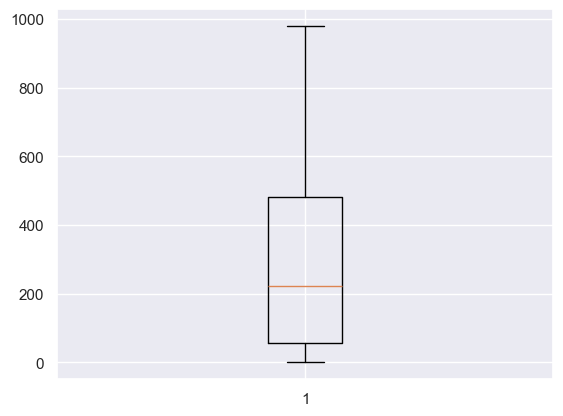

In [35]:
#creating plot 
plt.boxplot(df['block'])

#show plot
plt.show()

In [36]:
#IQR
Q1=df['block'].quantile(0.25)
Q3=df['block'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound, upper_bound

(-587.0, 1125.0)

In [37]:
df.block=df.block.clip(lower_bound,upper_bound)

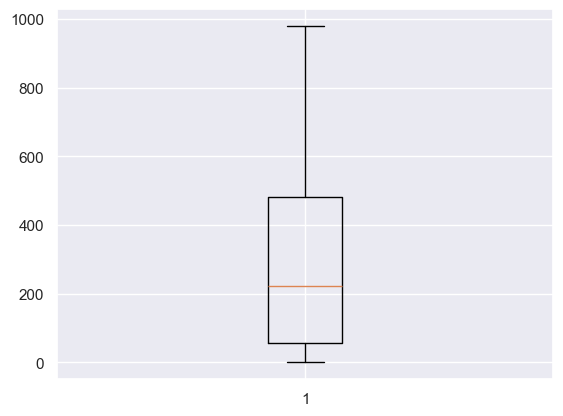

In [38]:
#creating plot
plt.boxplot(df['block'])

#show plot
plt.show()

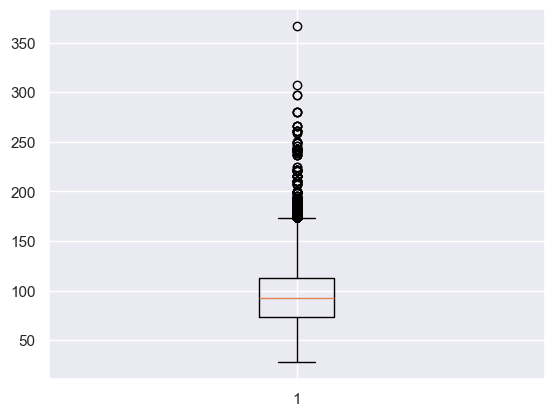

In [39]:
#creating plot 
plt.boxplot(df['floor_area_sqm'])

#show plot
plt.show()

In [40]:
Q1=df['floor_area_sqm'].quantile(0.25)
Q2=df['floor_area_sqm'].quantile(0.75)

IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(-542.0, 1098.0)

In [41]:
df.floor_area_sqm=df.floor_area_sqm.clip(lower_bound,upper_bound)

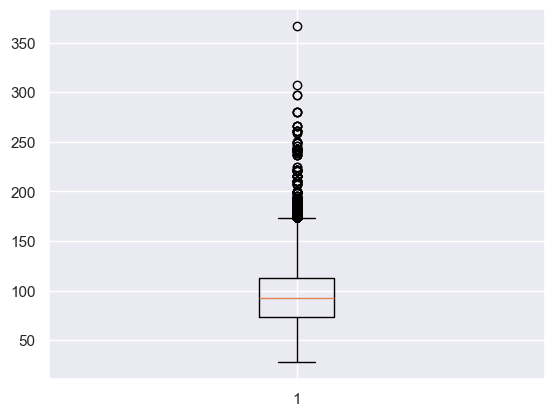

In [42]:
#creating plot

plt.boxplot(df['floor_area_sqm'])

#show plot
plt.show()

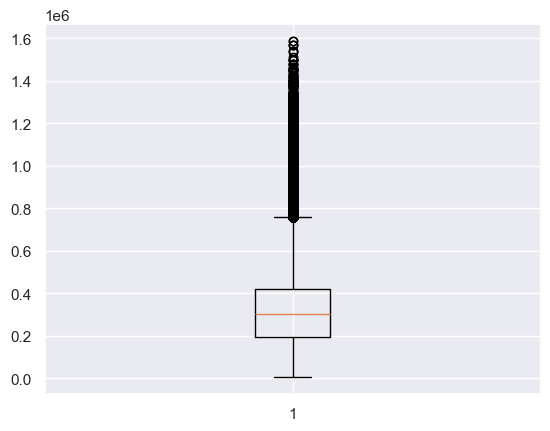

In [43]:
#creating plot
plt.boxplot(df['resale_price'])

#show plot
plt.show()

In [44]:
Q1=df['resale_price'].quantile(0.25)
Q3=df['resale_price'].quantile(0.75)

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(194385.0, 420615.0)

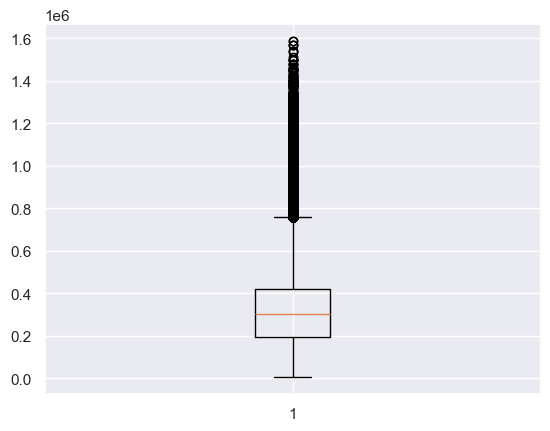

In [45]:
#creating plot
plt.boxplot(df['resale_price'])

#show plot
plt.show()

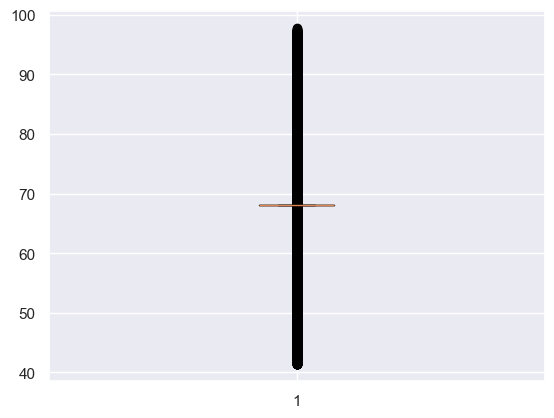

In [46]:
#craeting plot
plt.boxplot(df['remaining_lease'])

#show plot
plt.show()

In [47]:
Q1=df['remaining_lease'].quantile(0.25)
Q3=df['remaining_lease'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(68.0, 68.0)

In [48]:
df.remaining_lease=df.remaining_lease.clip(lower_bound,upper_bound)

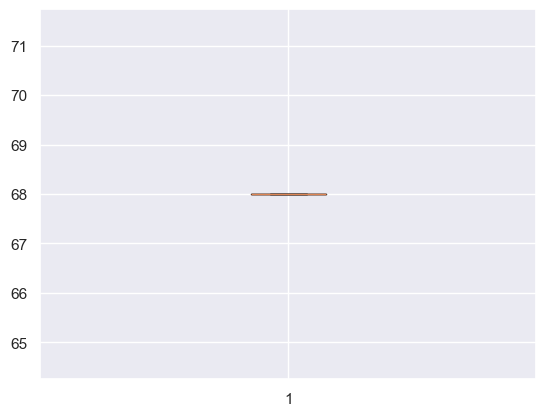

In [49]:
#creating plot
plt.boxplot(df['remaining_lease'])
#sow plot
plt.show()

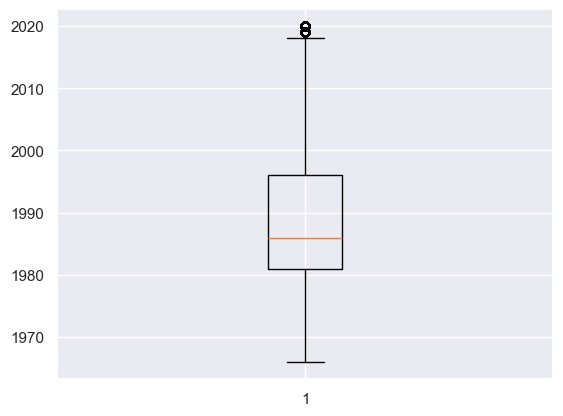

In [50]:
#creating plot
plt.boxplot(df['lease_commence_date'])

#show plot
plt.show()

In [51]:
Q1=df['lease_commence_date'].quantile(0.25)
Q3=df['lease_commence_date'].quantile(0.75)

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(1981.0, 1996.0)

In [52]:
df.lease_commence_date=df.lease_commence_date.clip(lower_bound,upper_bound)

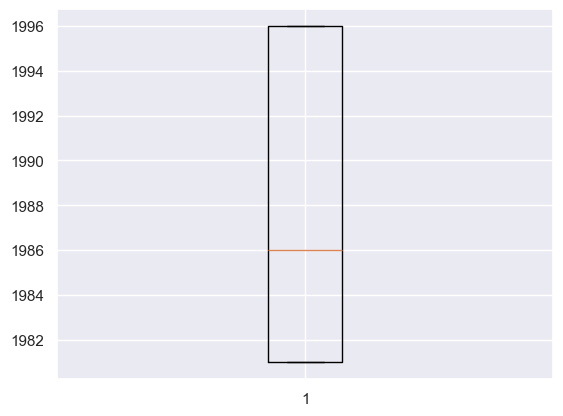

In [53]:
#creating plot
plt.boxplot(df['lease_commence_date'])

#show plot
plt.show()

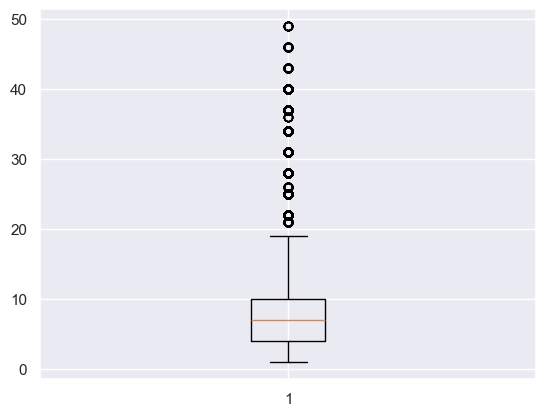

In [54]:
#creating plot
plt.boxplot(df['storey_lower_bound'])
plt.show()

In [55]:
Q1=df['storey_lower_bound'].quantile(0.25)
Q3=df['storey_lower_bound'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(-5.0, 19.0)

In [56]:
df.storey_lower_bound=df.storey_lower_bound.clip(lower_bound,upper_bound)

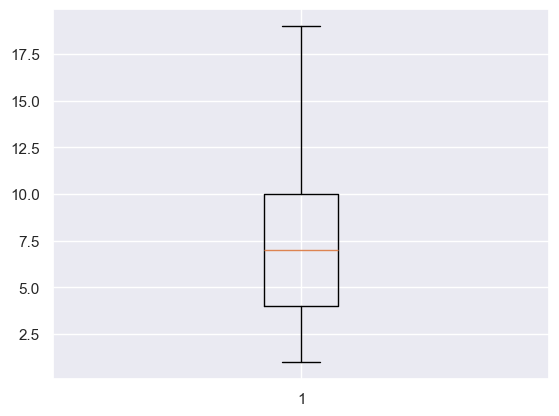

In [57]:
#creating plot
plt.boxplot(df['storey_lower_bound'])

#show plot
plt.show()

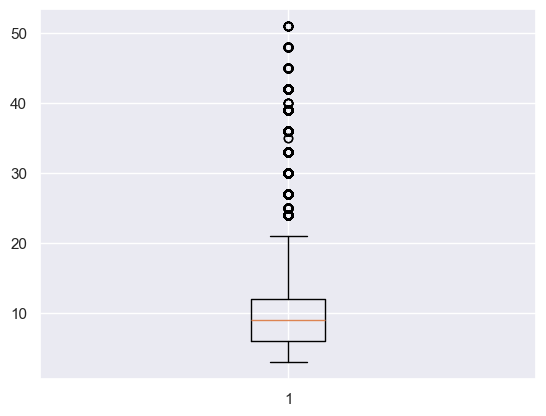

In [58]:
#creating plot
plt.boxplot(df['storey_upper_bound'])

#show plot
plt.show()

In [59]:
Q1=df['storey_lower_bound'].quantile(0.25)
Q2=df['storey_lower_bound'].quantile(0.75)

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(-5.0, 19.0)

In [60]:
df.storey_lower_bound=df.storey_lower_bound.clip(lower_bound,upper_bound)

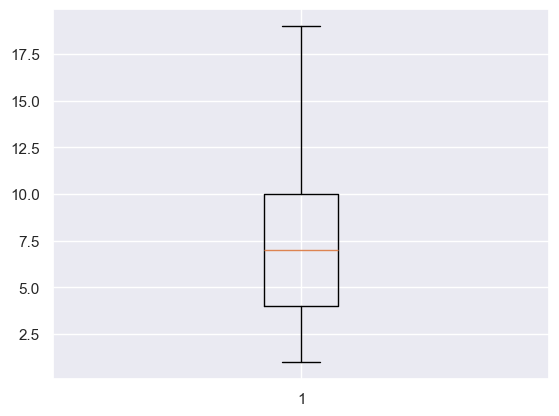

In [61]:
#creating plot
plt.boxplot(df['storey_lower_bound'])

#show plot
plt.show()

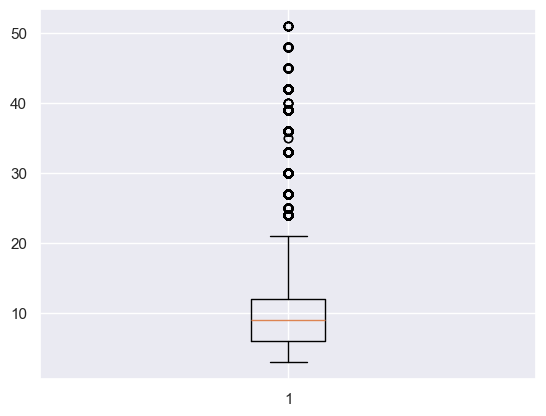

In [62]:
#creating plot
plt.boxplot(df['storey_upper_bound'])

#show plot
plt.show()

In [63]:
Q1=df['storey_upper_bound'].quantile(0.25)
Q3=df['storey_upper_bound'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

lower_bound,upper_bound

(-3.0, 21.0)

In [64]:
df.storey_upper_bound=df.storey_upper_bound.clip(lower_bound,upper_bound)

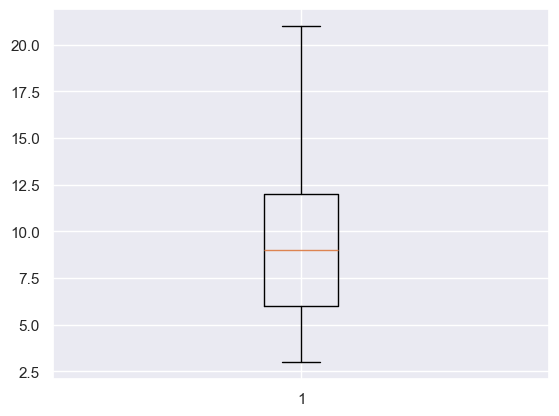

In [65]:
#creating plot
plt.boxplot(df['storey_upper_bound'])

#show plot
plt.show()

## Exploratary Data Analysis

Categorical vs Frequency using Bar Chart

In [67]:
object_data_cols=[var for var in df.columns if df[var].dtype=='object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

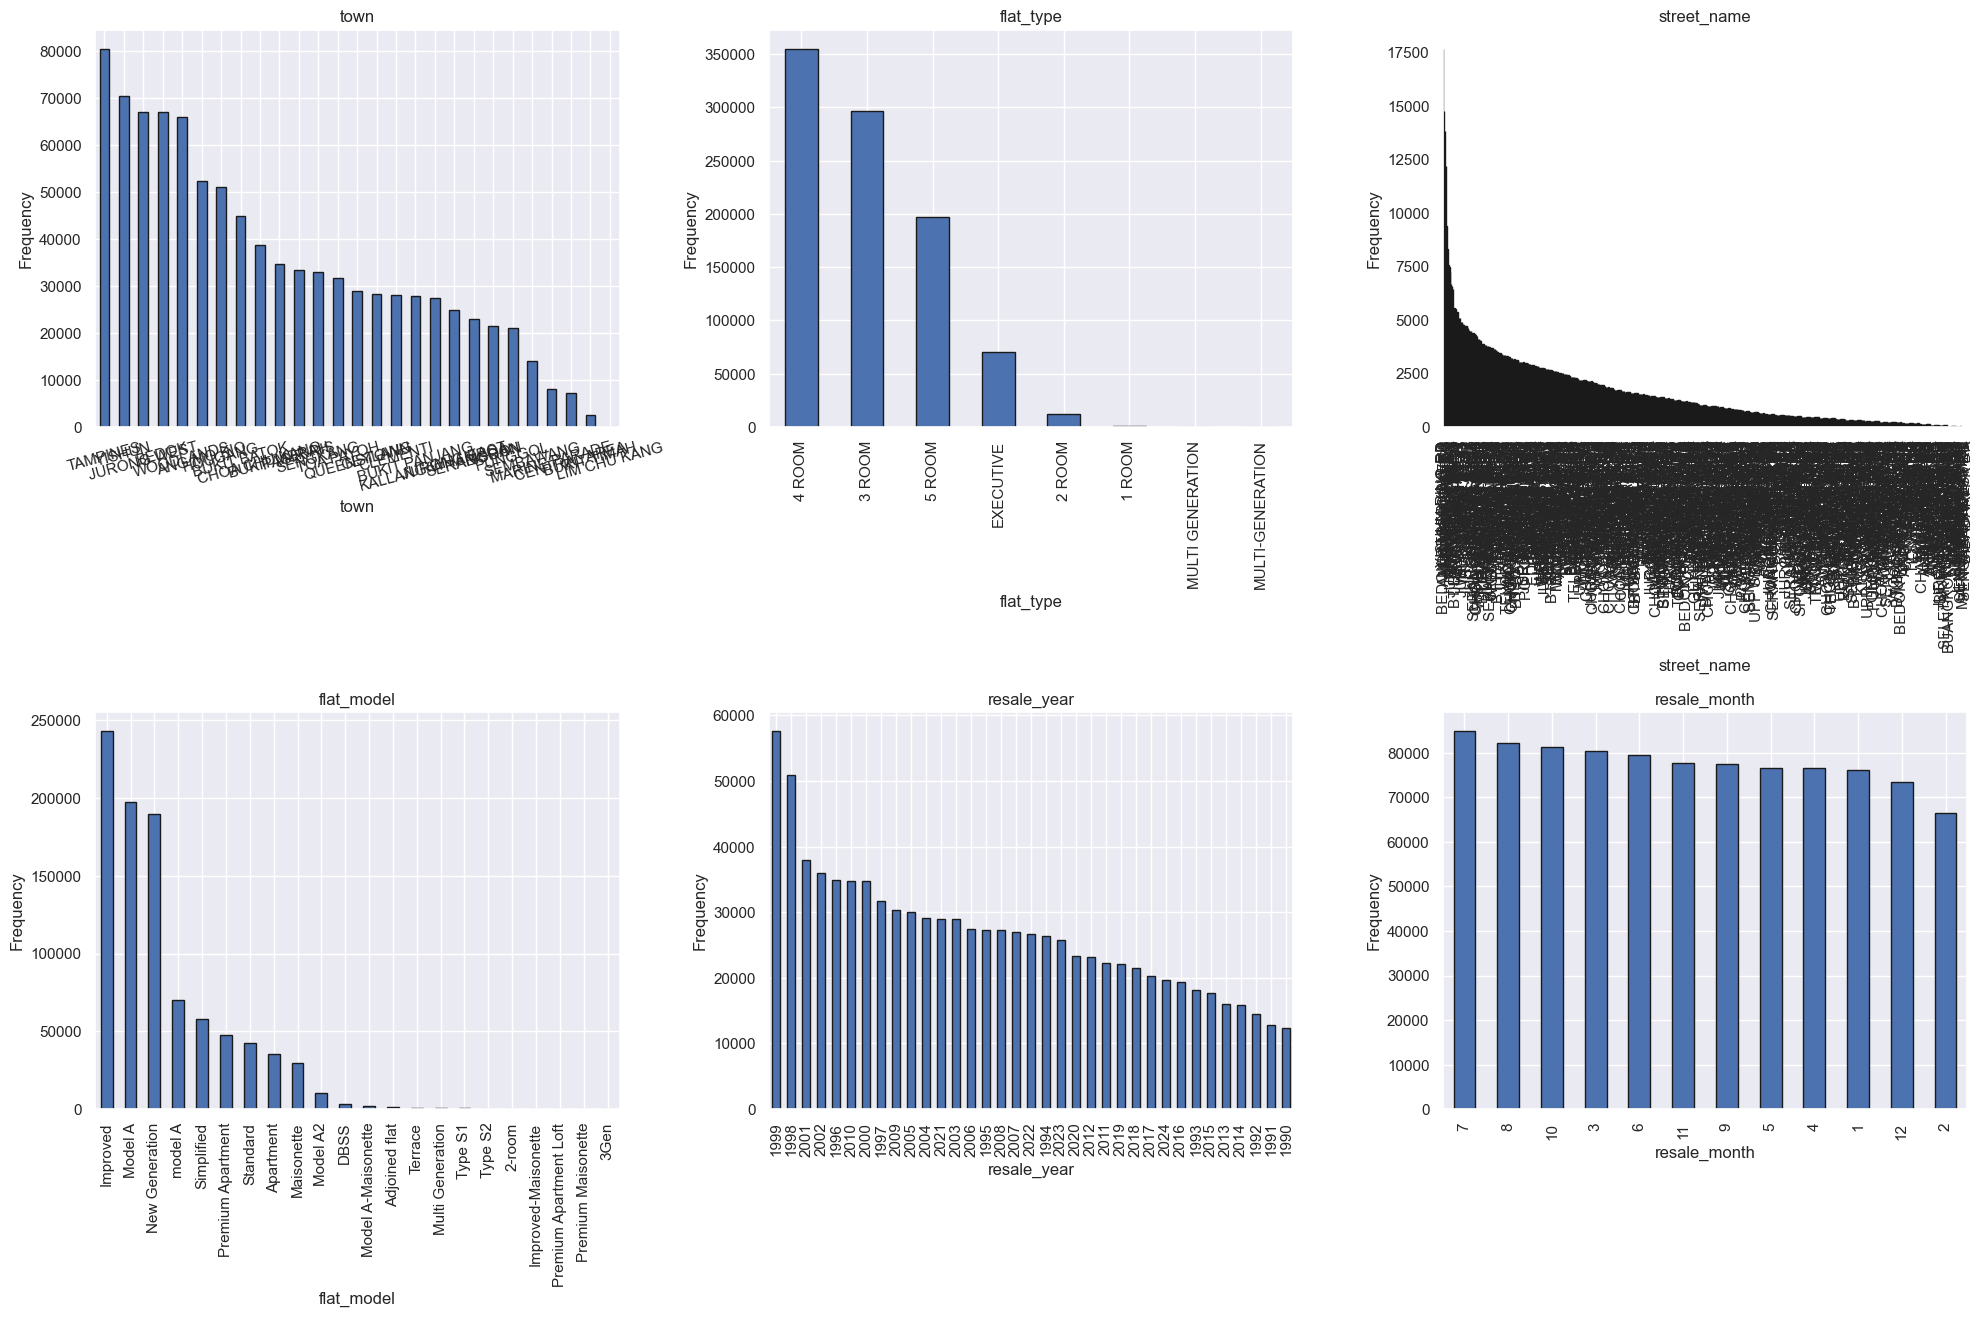

In [68]:
plt.figure(figsize=(20,25))

plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar',edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Features vs Target Variable (Categorical data)

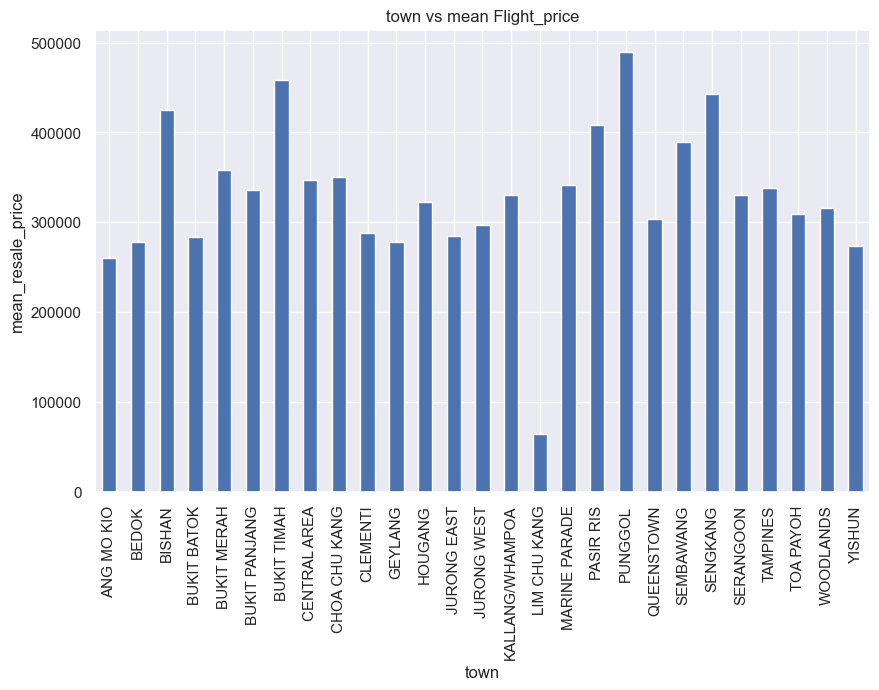

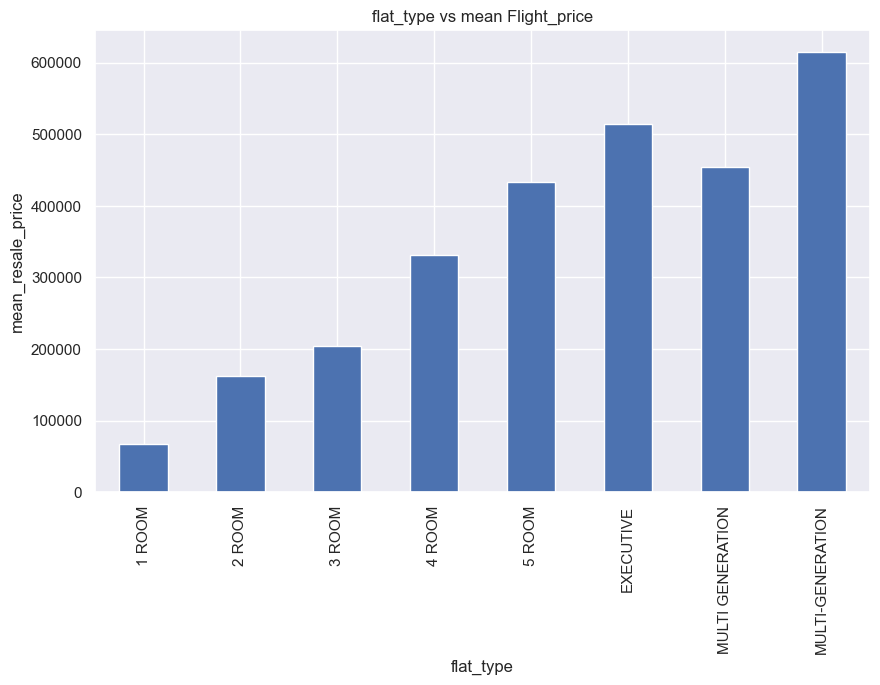

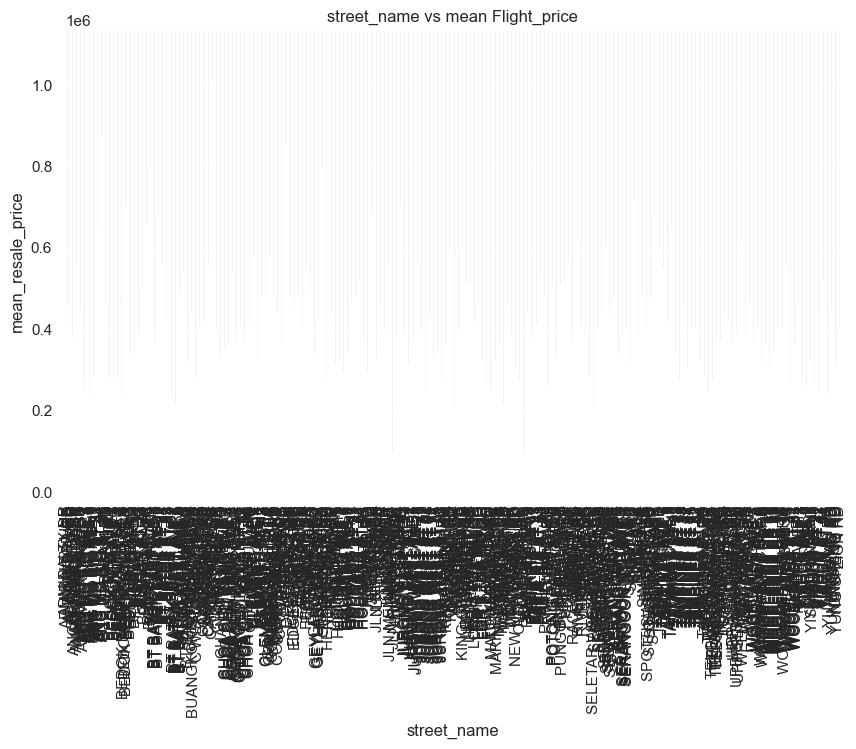

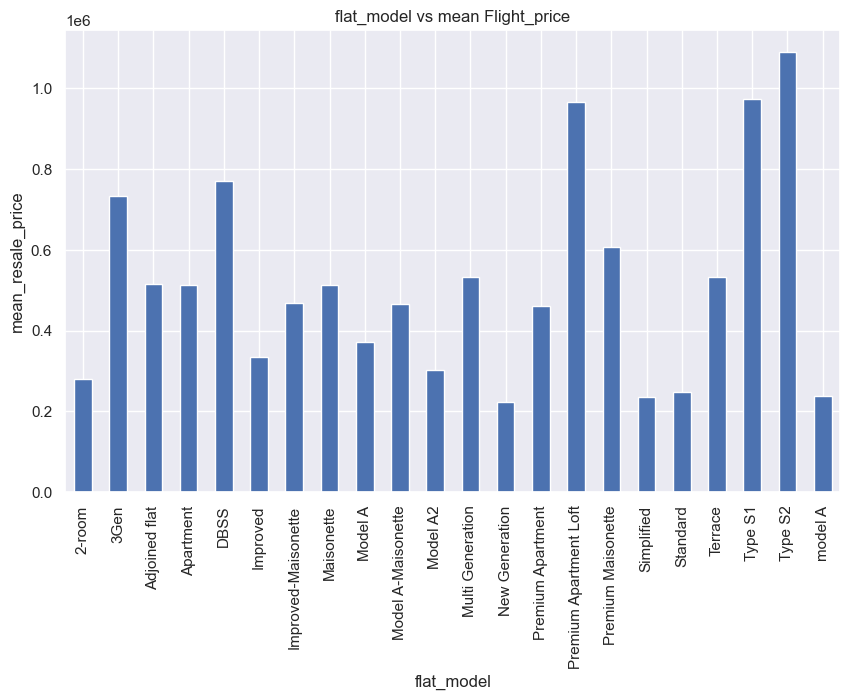

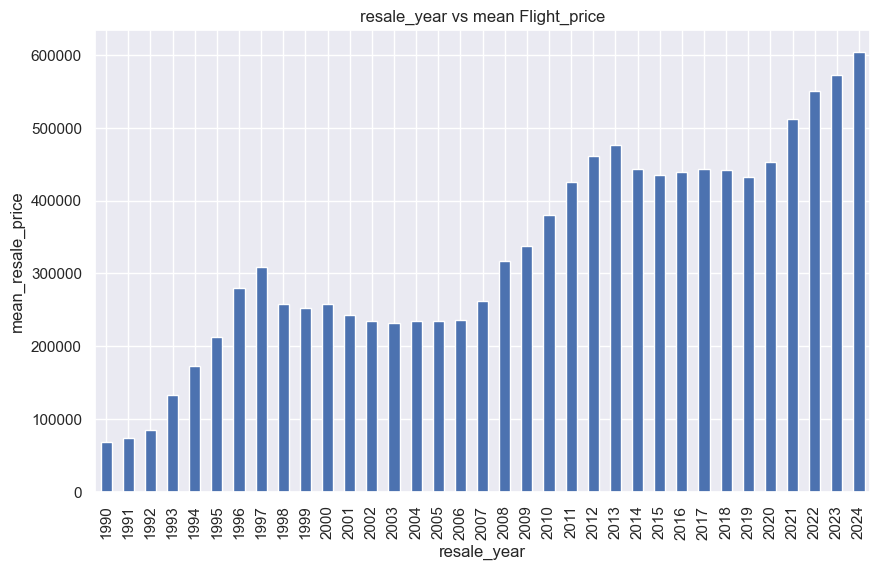

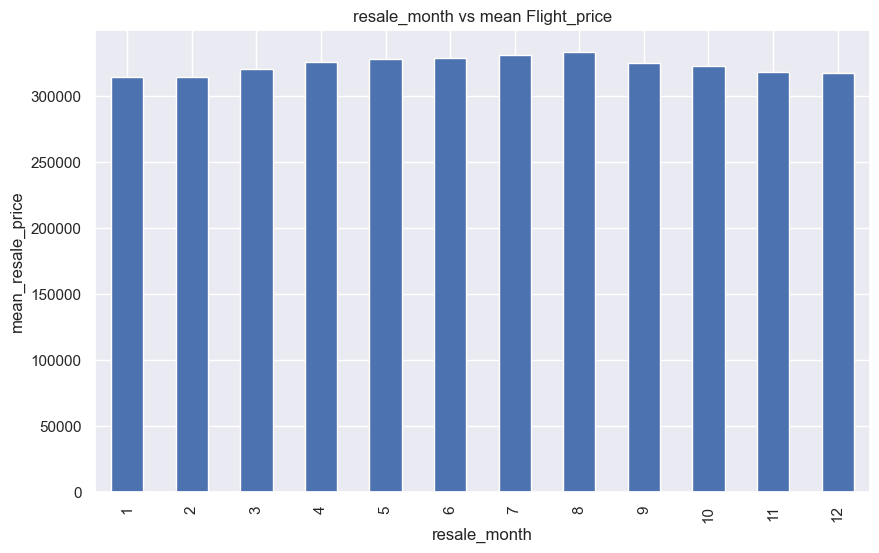

In [69]:
#List of features to plot
features=[
    'town',
    'flat_type',
    'street_name',
    'flat_model',
    'resale_year',
    'resale_month'
    
]

for feature in features:
    plt.figure(figsize=(10,6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('mean_resale_price')
    plt.title(f'{feature} vs mean Flight_price')
    plt.show()

### Features vs Target(Continuous Data)

In [70]:
float_data_cols=[var for var in df.columns if df[var].dtype=='float_64']
float_data_cols

[]

In [71]:
integer_data_cols=[var for var in df.columns if df[var].dtype =='int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

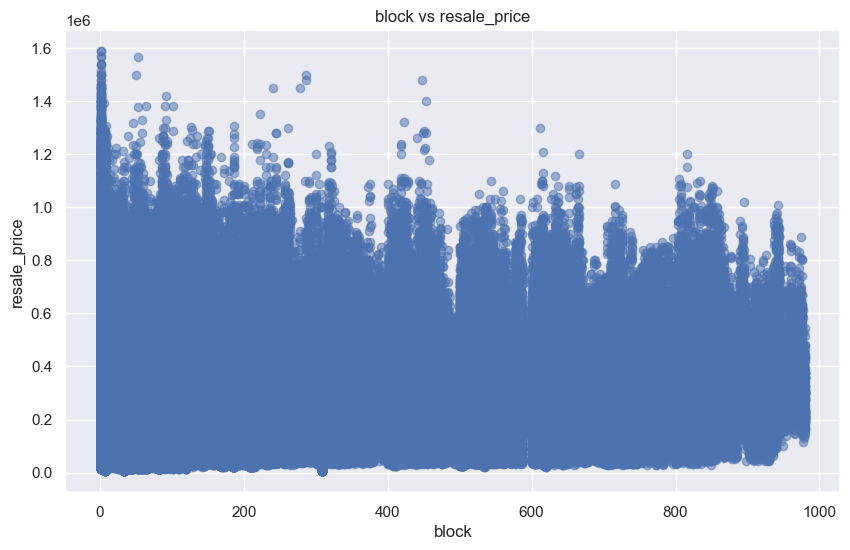

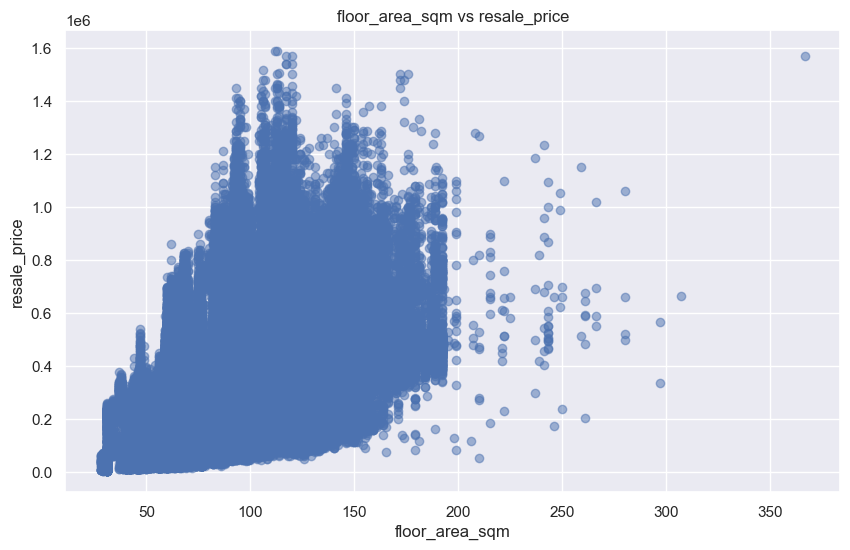

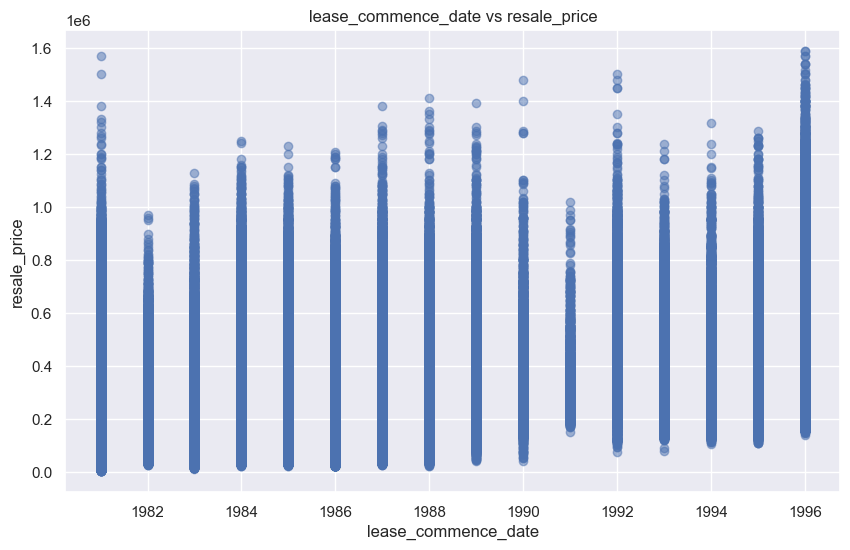

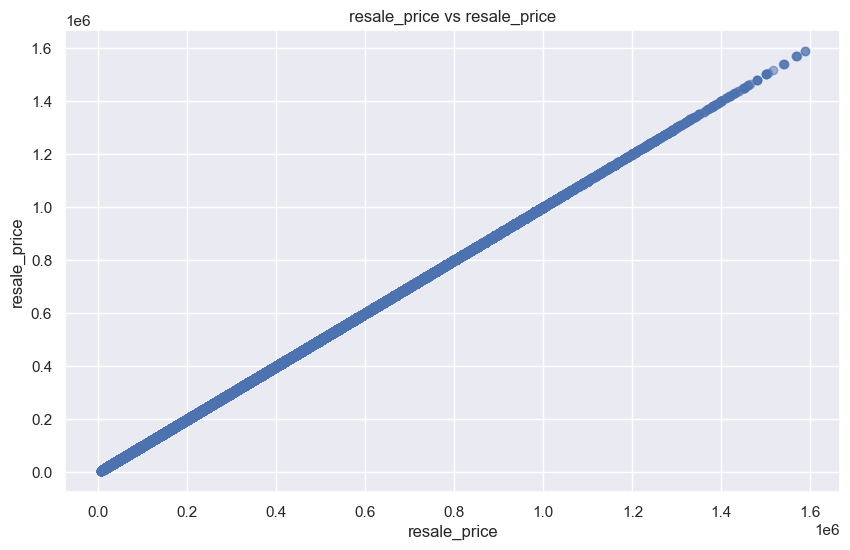

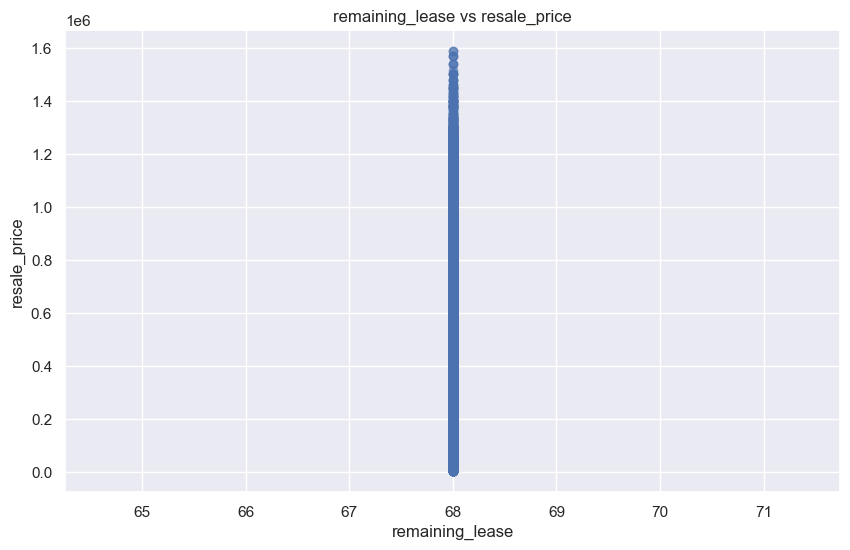

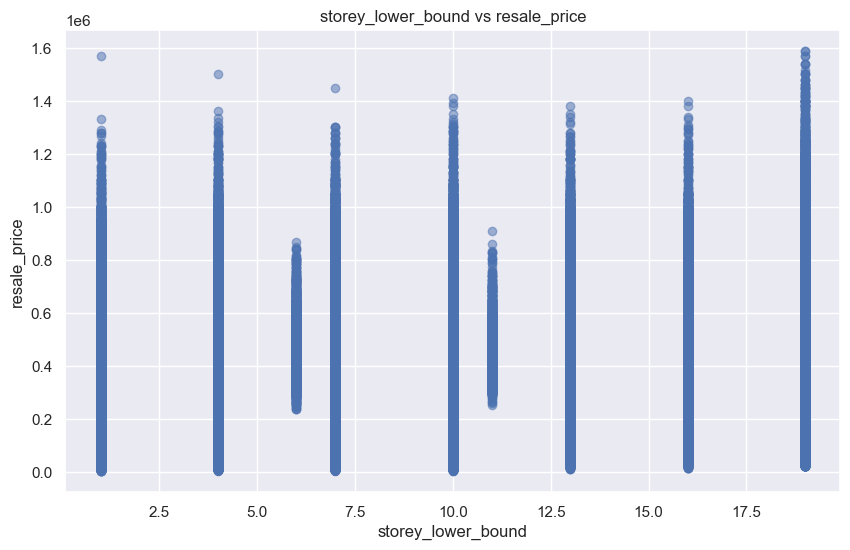

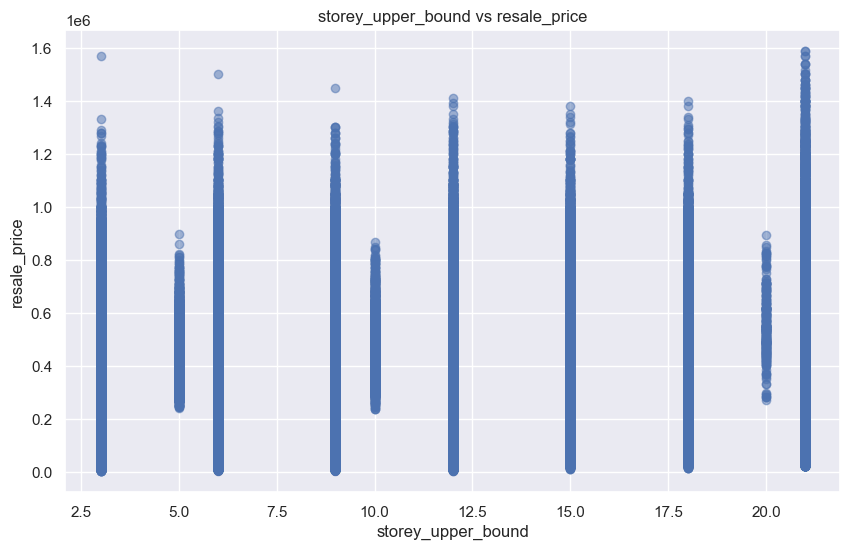

In [72]:
features=['block',
          'floor_area_sqm',
          'lease_commence_date',
          'resale_price',
          'remaining_lease',
          'storey_lower_bound',
          'storey_upper_bound']

target='resale_price'
for feature in features:
    plt.figure(figsize=(10,6))
    plt.scatter(df[feature],df[target],alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

### Encoding Categorical Variables

In [73]:
#using encoding make a copy
df1=df.copy()

object_data_cols=[var for var in df.columns if df[var].dtype=='object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [74]:
from sklearn.preprocessing  import LabelEncoder
#initialise the Encoder
le=LabelEncoder()

In [75]:
#list unique street names
streets=df1['street_name'].unique()
#map the streets to provide the input to the ML model 
streets_mapping ={street:idx+1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [76]:
#alter the column  with the mapped numbers 
df1['street_name']=df1['street_name'].map(streets_mapping)

#dispaly the dataframe 
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1981,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1981,6000.0,68.0,1990,1,4,6


In [77]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [78]:
category_mapping={
    '1 ROOM':1,
    '2 ROOM':2,
    '3 ROOM':3,
    '4.ROOM':4,
    '5.ROOM':5,
    'EXECUTIVE':6,
    'MULTI GENERATION':7
}

#alter the column with the mapped numbers 
df1['flat_type']=df1['flat_type'].map(category_mapping)

#display the dataframe
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1.0,309.0,1,31.0,Improved,1981,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1.0,309.0,1,31.0,Improved,1981,6000.0,68.0,1990,1,4,6


In [80]:
# creating a mapping of 'flat_model' values to numbers 
flat_model_mapping={
    'IMPROVED':1,
    'NEW GENERATION':2,
    'MODEL A':3,
    'STANDARD':4,
    'SIMPLIFIED':5,
    'MODEL A-MAISONETTE':6,
    'APARTMENT':7,
    'MAISONETTE':8,
    'TERRACE':9,
    '2-ROOM':10,
    'IMPROVED-MAISONETTE':11,
    'MULTI GENERATION':12,
    'PREMIUM APARTMENT':13,
    'Improved':14,
    'New Generation':15,
    'Model A':16,
    'Standard':17,
    'Apartment':18,
    'Simplified':19,
    'Model A-Maisonette':20,
    'Maisonette':21,
    'Multi Generation':22,
    'Adjoineed flat':23,
    'Premium Apartment':24,
    'Terrace':25,
    'Improved Maisonette':26,
    'Premium Maisonette':27,
     '2-room':28,
     'Model A2':29,
     'DBSS':30,
     'Type S1':31,
     'Type S2':32,
     'Premium Apartment Loft':33,
     '3Gen':34


}

#map ''flat_model' values to numbers 

df1['flat_model']=df1['flat_model'].map(flat_model_mapping)

#Display the Dataframe
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1.0,309.0,1,31.0,NaN,1981,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1.0,309.0,1,31.0,NaN,1981,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1.0,309.0,1,31.0,NaN,1981,8000.0,68.0,1990,1,10,12


In [81]:
#create a mapping of  'town' values to numbers 
town_mapping={
    'ANG MO KIO':1,
    'BEDOK':2,
    'BISHAN':3,
    'BHUKIT BATOK':4,
    'BHUKIT MERAH':5,
     'BHUKIT TIMAH':6,
     'CENTRAL AREA':7,
     'CHOA CHU KANG':8,
     'CLEMENTI':9,
     'GEYLANG':10,
     'HOUGANG':11,
     'JURONG EAST':12,
     'JURONG WEST':13,
     'KALLANG/WHAMPOA':14,
     'MARINE PARADE':15,
     'QUEENSTOWN':16,
     'SENGKANG':17,
     'SERANGOON':18,
     'TAMPINES':19,
      'TOA PAYOH':20,
      'WOODLANDS':21,
      'YISHUN':22,
      'LIM CHU KANG':23,
      'SEMBAWANG':24,
      'BUKIT PANJANG':25,
      'PASIR RIS':26,
      'PUNGGOL':27

    
}
#Map 'town' values to numbers 
df1['town']=df1['town'].map(town_mapping)

#Display the dataframe 
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1.0,1.0,309.0,1,31.0,NaN,1981,9000.0,68.0,1990,1,10,12
1,1.0,1.0,309.0,1,31.0,NaN,1981,6000.0,68.0,1990,1,4,6
2,1.0,1.0,309.0,1,31.0,NaN,1981,8000.0,68.0,1990,1,10,12
3,1.0,1.0,309.0,1,31.0,NaN,1981,6000.0,68.0,1990,1,7,9


In [82]:
#save the processed data for the deployment 
df1.to_csv('final.csv')

## Correlation

In [83]:
#correlation matrix (ranges from 1 to -1)
corrm=df1.corr()

#corrm.to_csv('corrm_csv')
corrm 

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.238733,-0.003715,0.587653,0.193180,NaN,0.405383,0.125966,NaN,0.129807,0.003340,-0.012182,-0.011885
flat_type,0.238733,1.000000,0.215823,0.463555,0.971780,NaN,0.630321,0.710481,NaN,0.068847,0.003592,-0.001922,-0.001517
block,-0.003715,0.215823,1.000000,0.066906,0.187937,NaN,0.080651,-0.092008,NaN,-0.119156,0.001742,-0.125615,-0.125644
street_name,0.587653,0.463555,0.066906,1.000000,0.360051,NaN,0.806535,0.355641,NaN,0.306925,0.006701,0.071086,0.071695
floor_area_sqm,0.193180,0.971780,0.187937,0.360051,1.000000,NaN,0.477333,0.555841,NaN,0.061165,0.002831,0.042863,0.043049
flat_model,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lease_commence_date,0.405383,0.630321,0.080651,0.806535,0.477333,NaN,1.000000,0.499626,NaN,0.366441,0.006457,0.112024,0.112677
resale_price,0.125966,0.710481,-0.092008,0.355641,0.555841,NaN,0.499626,1.000000,NaN,0.679666,0.006650,0.219785,0.222205
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.129807,0.068847,-0.119156,0.306925,0.061165,NaN,0.366441,0.679666,NaN,1.000000,-0.022775,0.097532,0.099493


#### Heapmap

<Axes: >

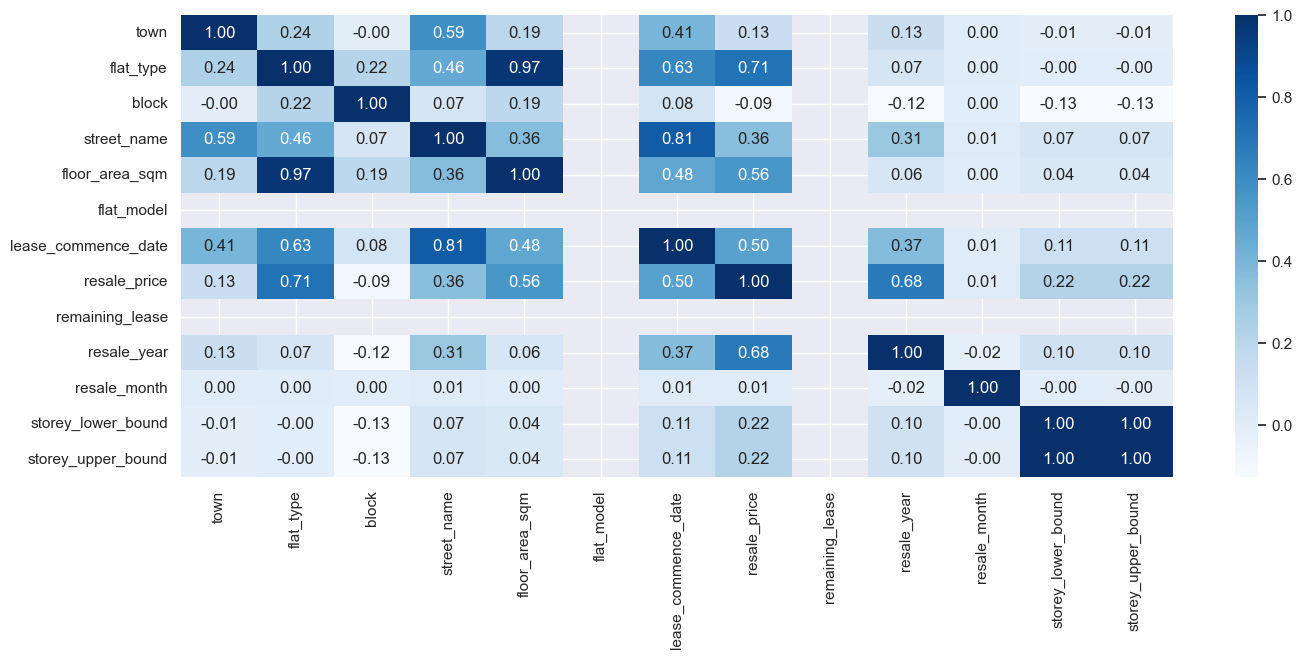

In [84]:
#visualize the correlation matrix in seaborn using a heatmap 
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

## Machine Learning

In [85]:
#splitting the dataframe 
#assign feature and target variable 
x=df1.drop('resale_price',axis=1)
y=df1['resale_price']
#splitting the data into training and  testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
x_train, x_test,y_train ,y_test=train_test_split(x,y,test_size=0.2,random_state=72)

In [86]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(746157, 12) (186540, 12) (746157,) (186540,)


### Scaling

In [87]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled,x_test_scaled

(array([[-0.20397046, -0.42997312, -0.32487011, ...,  0.42484319,
          0.09189847,  0.08870529],
        [ 0.84858266,         nan,  1.59708777, ..., -0.457189  ,
          0.76495634,  0.76188191],
        [-0.33553959,         nan,  0.18130889, ..., -0.75119972,
          0.76495634,  0.76188191],
        ...,
        [ 1.37485922,         nan, -0.18785926, ..., -0.16317827,
          1.4380142 ,  1.43505853],
        [ 0.19073696,         nan, -0.75873784, ...,  0.42484319,
          1.4380142 ,  1.43505853],
        [        nan,         nan,  0.4477189 , ...,  0.71885392,
         -0.5811594 , -0.58447133]]),
 array([[ 0.9801518 ,         nan,  0.28406704, ...,  0.13083246,
          0.76495634,  0.76188191],
        [-0.86181615,         nan,  0.53905947, ...,  0.71885392,
         -0.5811594 , -0.58447133],
        [-0.46710873,         nan,  1.45627105, ..., -1.33922118,
          0.76495634,  0.76188191],
        ...,
        [-1.65123099,         nan, -1.10507084, ...,  

### Fitting the Model

In [89]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  #using XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### K Nearest Neighbor Regression

In [90]:
#x train_scaled and y train_scaled has null values so replacing them with x_train_imputed,x_test_imputed

from sklearn.impute import SimpleImputer

# Instantiate the imputer with strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on training data
x_train_imputed = imputer.fit_transform(x_train_scaled)

# Transform the test data using the trained imputer
x_test_imputed = imputer.transform(x_test_scaled)

In [91]:
#create and train the K Nearest Neighbor Regression model 
knn_regressor=KNeighborsRegressor(n_neighbors=5) #may need to adjust number of neighbours 
knn_regressor.fit(x_train_imputed,y_train)

#make predictions on the test set using KNN model 
y_pred_knn=knn_regressor.predict(x_test_imputed)

#calculate Mean Absolute error (MAE)
mae_knn=mean_absolute_error(y_test,y_pred_knn)

#calculate Mean Squared error (MSE)
mse_knn=mean_squared_error(y_test,y_pred_knn)

#calculate the root mean squared error
rmse_knn=np.sqrt(mse_knn)

#calculate R-squared (r2 ) score:
r2_knn=r2_score(y_test,y_pred_knn)

print("Mean Absolute Error(MAE)    :",mae_knn)
print("Mean Squared Error (MSE)    :",mse_knn)
print("Root Mean square Error(RMSE):",rmse_knn)
print("R-squared(r2)score          :",r2_knn)

Mean Absolute Error(MAE)    : 31237.5554483328
Mean Squared Error (MSE)    : 2290215849.4285297
Root Mean square Error(RMSE): 47856.19969688911
R-squared(r2)score          : 0.9232843075644712


### Decision tree Regression

In [92]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [93]:
#CREATE AND TRAIN THE DECISION TREE REGRESSOR MODEL 
dt_regressor=DecisionTreeRegressor(max_depth=20,random_state=11)
dt_regressor.fit(x_train,y_train)

#make prediction on the test set using decision tree model 
y_pred_dt=dt_regressor.predict(x_test) 

#calculating the mean absolute error (MAE)
mae_dt=mean_absolute_error(y_test,y_pred_dt)

#calculating the mean squared error 
mse_dt=mean_squared_error(y_test,y_pred_dt)

#calculating Root mean squared error 
r2_dt=r2_score(y_test,y_pred_dt)

print("Mean Absolute Error (MAE)   :",mae_dt)
print("Mean Squared Error (MSE))  :" ,mse_dt)
print("Root Mean Squared Error (RMSE):" ,r2_dt)

Mean Absolute Error (MAE)   : 91894.17998650672
Mean Squared Error (MSE))  : 14153984877.49766
Root Mean Squared Error (RMSE): 0.5258819159468398


### Random Forest Regression


In [94]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

#create and train the random forest regressor model 
rf_regressor=RandomForestRegressor(random_state=42)
rf_regressor.fit(x_train,y_train)

# make prediction using the test set 
y_pred=rf_regressor.predict(x_test)

#calculate mean absolute error (MAE)
mae=mean_absolute_error(y_test,y_pred)

#calculate the mean squared error (MSE)
mse=mean_squared_error(y_test,y_pred)

#calculating the root mean squared error
rmse=np.sqrt(mse)

#calculate the R-squared (R2) score
rf_r2=r2_score(y_test,y_pred)

print("Mean Absolute Error(MAE)  :",mae)
print("Mean Squared Error(MSE)    :",mse)
print("Root Mean Square Error (RMSE):",rmse)
print("R-squared (R2)score          :",rf_r2 )

Mean Absolute Error(MAE)  : 74614.25513586798
Mean Squared Error(MSE)    : 10070480733.082645
Root Mean Square Error (RMSE): 100351.7849023257
R-squared (R2)score          : 0.6626676464622923


## XG Boost Resression

In [95]:
#create and train an XGBOOST REGRESSOR 
xgregressor= XGBRegressor()
xgregressor.fit(x_train,y_train)

#make predictions
y_pred=xgregressor.predict(x_test)

#calculating mean absolute error (MAE)
mae=mean_absolute_error(y_test,y_pred)

#calculating mean squared error (MSE)
mse=mean_squared_error(y_test,y_pred)

#calculating the root mean squared error (RMSE)
rmse=np.sqrt(mse)

#calcualte R-squared (r2) score
xgb_r2=r2_score(y_test,y_pred)

print("Mean Absolute Error (MAE)   :",mae)
print("Mean squared Error(MSE)  :",mse)
print("Root Mean Squared Error (RMSE)     :",rmse)
print("R-squared (R2) Score      :",xgb_r2)

Mean Absolute Error (MAE)   : 18614.239926896902
Mean squared Error(MSE)  : 727319815.0124794
Root Mean Squared Error (RMSE)     : 26968.867514459696
R-squared (R2) Score      : 0.9756368626805697


### Finalizing the Models

In [96]:
models=['KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','XGBRegressor']
score=[r2_knn,r2_dt,rf_r2,xgb_r2]

fig=px.bar(x=models, y=score , title='R_2 Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score=max(score)  #Intialise max_score with the maximum value in the score list \
max_model=""

for model , score_value in zip(models,score):
    print(model,score_value)
    if score_value ==max_score:
        max_model=model

print(f"\nModel: {max_model} contain Maximum R2_Score:{max_score}")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9232843075644712
DecisionTreeRegressor 0.5258819159468398
RandomForestRegressor 0.6626676464622923
XGBRegressor 0.9756368626805697

Model: XGBRegressor contain Maximum R2_Score:0.9756368626805697


### Suggestion

In [97]:
rf_regressor.feature_importances_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

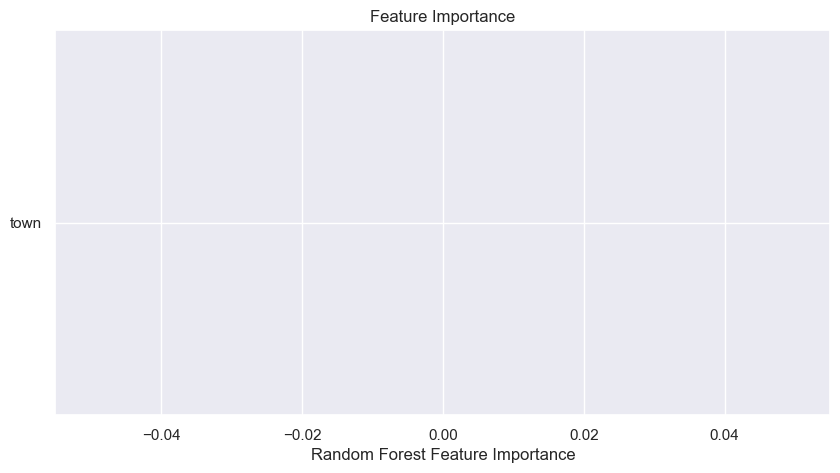

In [99]:
sorted_idx=rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx],rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

plt.show()

### Saving the model

In [100]:
model=rf_regressor.fit(x_train,y_train)

In [101]:
model

RandomForestRegressor(random_state=42)

In [102]:
import pickle

#save the model to disk 
filename='RandomForestRegressor_model.pkl'
with open(filename,'wb')as file:
    pickle.dump(model,file)

print(f"saved{filename} model to disk")

savedRandomForestRegressor_model.pkl model to disk


### Predicting

In [103]:
#get sample to predict the resale price 
pre_df=df1.sample(n=5)
pre_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
196012,22.0,NaN,730.0,247,122.0,NaN,1987,358000.0,68.0,1998,5,10,12
847641,2.0,NaN,79.0,14,92.0,NaN,1981,420000.0,68.0,2021,7,7,9
800017,24.0,NaN,2.0,467,111.0,NaN,1996,375000.0,68.0,2019,7,4,6
651727,9.0,3.0,509.0,85,67.0,NaN,1981,208000.0,68.0,2008,11,1,3
418120,9.0,3.0,728.0,92,82.0,NaN,1981,162000.0,68.0,2001,3,10,12


In [104]:
#drop the resale price column
A=pre_df.drop('resale_price',axis=1)

### Resale Price

In [105]:
#make predictions on the sample
pre_pred=rf_regressor.predict(A)
pre_pred

array([275784.37849744, 503371.94342232, 488414.39036699, 208756.08780464,
       205440.113013  ])